# Hw7

### 1, ISLP chapter 8 exercise #5

(1) vote: P>=0.5 red, P<0.5 green, then 6 are red and 4 green, 6>4, it's red

(2) average: (0.1+0.15+0.2+0.2+0.55+0.6+0.6+0.65+0.7+0.75)/10=0.45, 0.45<0.5, green

### 2

Since it's decision stump, only one predictor is considered for splitting each time, then for p times there are p additive splitting functions, which is sum of functions of individual predictors.

### 3

#### (a)

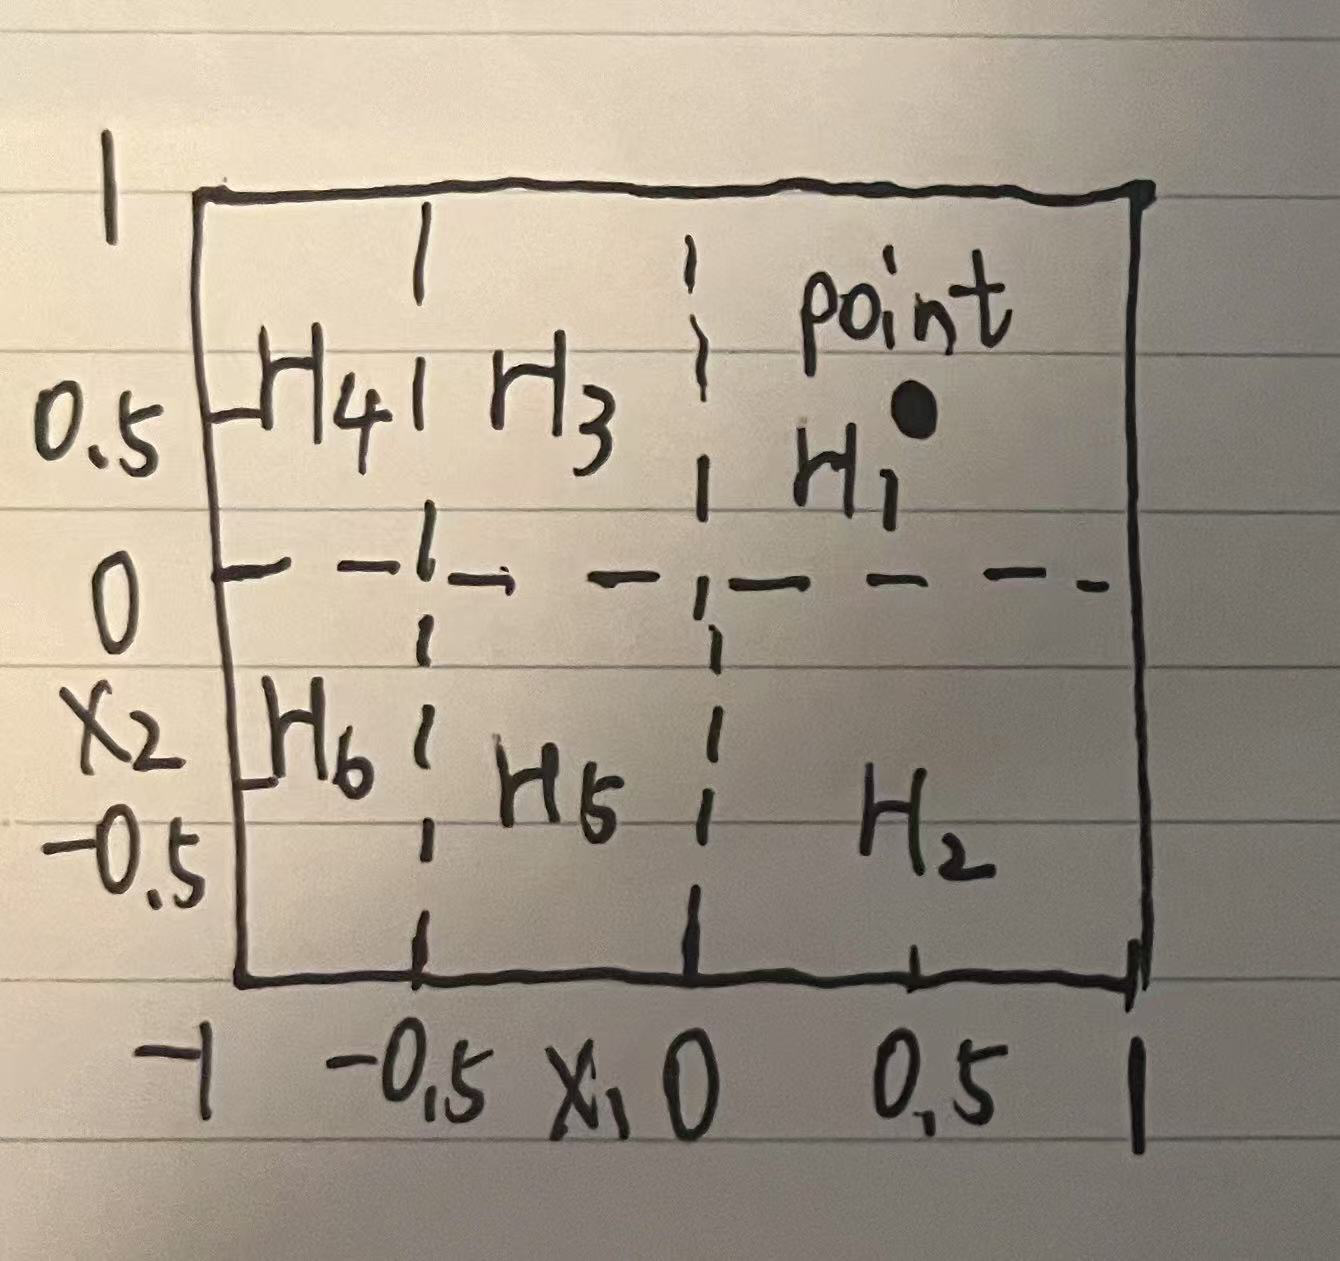

In [19]:
from IPython.display import display
from PIL import Image
img = Image.open("C:\\Users\\DELL\\Downloads\\1e73f0b34552c9a9b5c3b93faecd96a.jpg")
display(img)

#### (b)

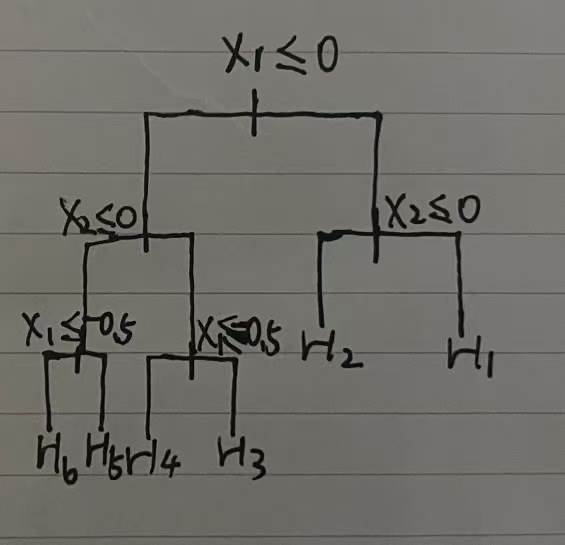

In [21]:
img = Image.open("C:\\Users\\DELL\\Downloads\\6a4f6ad5b95bc06889045e26e7bd626.jpg")
display(img)

#### (c)

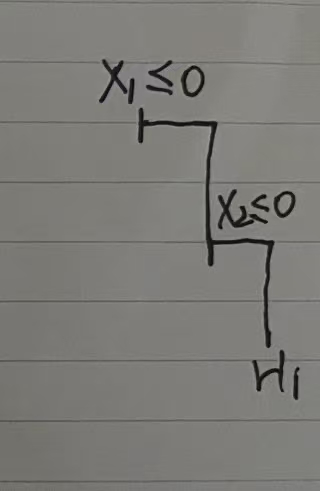

In [23]:
img = Image.open("C:\\Users\\DELL\\Downloads\\5f1e79adea2af032854f2954097b55d.jpg")
display(img)

### 4

#### (a)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
crab=pd.read_csv("C:\\Users\\DELL\\Downloads\\crabs.csv")
y=crab.loc[:,["sp","sex"]]
X=crab.loc[:,["FL","RW","CL","CW","BD"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6789,stratify=y)

#### (b)

Best max_leaf_nodes: 9


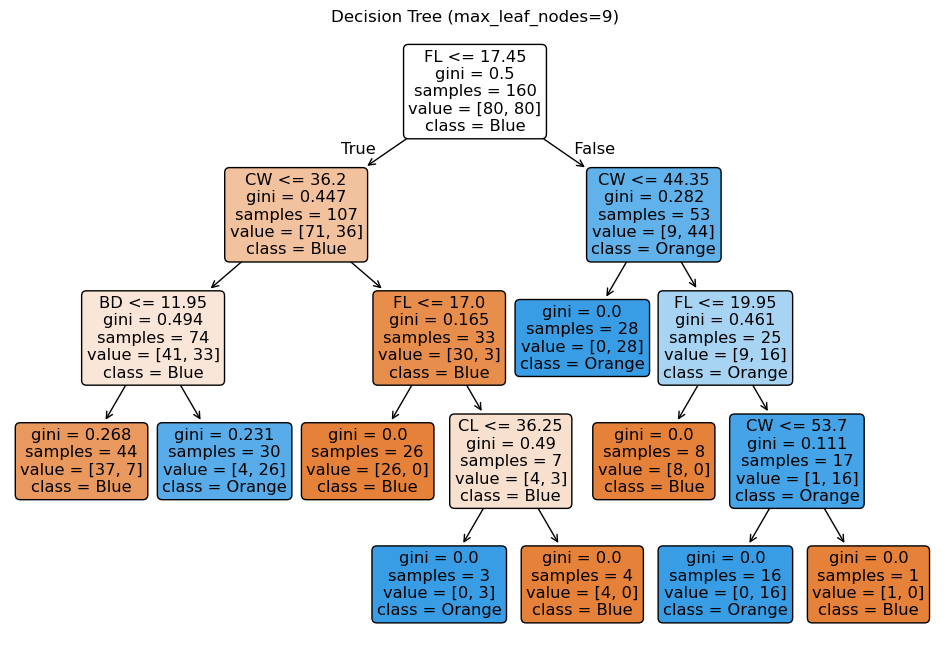

Training error: 0.0687
Test error: 0.1750
Feature importances: [0.47222489 0.         0.05593655 0.18043117 0.29140739 0.        ]


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
y=crab[["sp"]]
X=crab.loc[:,["FL","RW","CL","CW","BD","sex"]]
X["sex"]=X["sex"].map({"M":0,"F":1})
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6789,stratify=y)
param_grid = {'max_leaf_nodes': range(2, 11)}
clf = DecisionTreeClassifier(random_state=6789)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
print(f"Best max_leaf_nodes: {best_max_leaf_nodes}")
best_clf = DecisionTreeClassifier(max_leaf_nodes=best_max_leaf_nodes, random_state=6789)
best_clf.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['Blue', 'Orange'], rounded=True)
plt.title(f"Decision Tree (max_leaf_nodes={best_max_leaf_nodes})")
plt.show()
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)
train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)
print(f"Training error: {train_error:.4f}")
print(f"Test error: {test_error:.4f}")
print("Feature importances:", best_clf.feature_importances_)

Here BD, CW and FL, CL are used, among which FL, BD and CW are used most. training error is 0.0687 and testing error is 0.175

#### (c)

D:\Anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training error: 0.0000
Test error: 0.1250


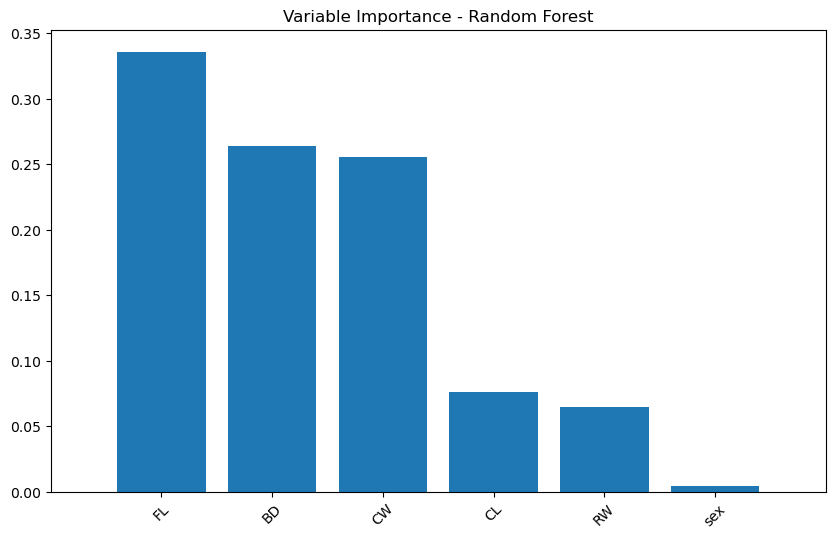

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_features=5, random_state=6789)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)
print(f"Training error: {train_error:.4f}")
print(f"Test error: {test_error:.4f}")
importances = rf.feature_importances_
indices = importances.argsort()[::-1] 
plt.figure(figsize=(10, 6))
plt.title("Variable Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

From the result it seems that CW, BD, FL are the three most common used variable for classification here , which are also often used in tree plot. Training set error is close to 0 and testing error is 0.125

#### (d)

D:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


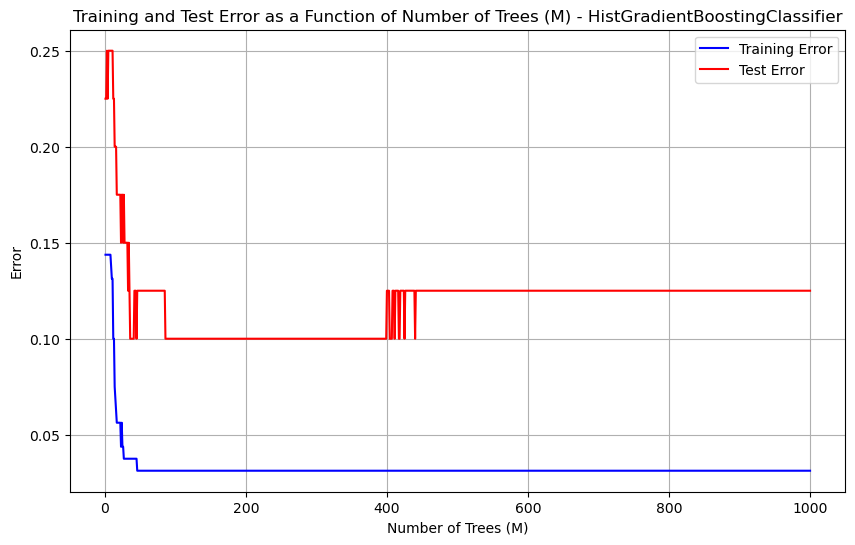

Training error for M=100: 0.0312
Test error for M=100: 0.1000


In [10]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=1000, random_state=6789)
clf.fit(X_train, y_train)
train_errors = []
test_errors = []
for y_train_pred, y_test_pred in zip(clf.staged_predict(X_train), clf.staged_predict(X_test)):
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))  
    test_errors.append(1 - accuracy_score(y_test, y_test_pred)) 
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), train_errors, label='Training Error', color='blue')
plt.plot(range(1, 1001), test_errors, label='Test Error', color='red')
plt.xlabel('Number of Trees (M)')
plt.ylabel('Error')
plt.title('Training and Test Error as a Function of Number of Trees (M) - HistGradientBoostingClassifier')
plt.legend()
plt.grid(True)
plt.show()
M_chosen = 100
train_error_chosen = train_errors[M_chosen - 1]
test_error_chosen = test_errors[M_chosen - 1]
print(f"Training error for M={M_chosen}: {train_error_chosen:.4f}")
print(f"Test error for M={M_chosen}: {test_error_chosen:.4f}")

training error is 0.0312 and testing error is 0.1 because they are all the lowest value of training and testing error at the end respectively.

#### (e)

boosting is the best because it has the smallest testing error, the training and testing error in these three method are not consistent as although the rank of training error from the methods are also the rank of testing error from the methods for the majority, training error of boosting is larger than that of random forest.

In [28]:
!jupyter nbconvert --to html stats_503_hw7.ipynb

[NbConvertApp] Converting notebook stats_503_hw7.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 2763742 bytes to stats_503_hw7.html
